In [1]:
# In this script I want to solve the system of odes for assembling two 3-membered rings  
# with synthesis and degradation NOT included 
# Name: Leo Lagunes and Paige M.
# Date: 07/14/21 

# Last update: 09/27/21
#need to add LSODA PKG--> check if i did right 

# IMPORTANT NOTE: The equations were written and developed by Drs. Eric Deeds and Koan Briggs, this code was developed by LL + PM

#skip this cell if you've run it before
#import Pkg; Pkg.precompile()
#Pkg.add("Plots")
using Pkg
using Plots; gr()
#Pkg.add("DifferentialEquations")
using DifferentialEquations
#Pkg.add("LSODA")
using LSODA

#println("Almost ready!")
#Pkg.update()
#ENV["GRDIR"]=""
#Pkg.build("GR")
println("Ready bitch!")
#println("............")

Ready bitch!


In [2]:
# This cell contains all the functions + packages to run everything

#------------------------------------
#--- List of packages here ---
#------------------------------------
using DifferentialEquations
using Plots; gr()
# -----------------------------------
# --- Solve the system of ode's -----
# -----------------------------------
function StackedRings_sd(paramvaluesList)
    x0Val, kOn, δ, Q, kd1, kd2 = paramvaluesList
    p = kOn, δ, Q
    keff(i,j)= c0^(-i-j+1)*kOn*(kd1)^i*(kd2)^j*ℯ^(-(i+j-1)*ΔGp/(Rconst*T))
    function TwoStackedRingsSystem!(dx, x, p, t)
        dx[1] = kOn*x[1]*(-6*x[1] -4*x[2] -3*x[3] - 3*x[4] -2*x[5] -3*x[6] -2*x[7] - 2*x[8] -3*x[9] -2*x[10]-x[11]) + 2*keff(0,1)*x[2] +2*keff(1,0)*x[3] + keff(1,0)*x[4] + keff(0,1)*x[4] + 2*keff(1,0)*x[5] + keff(1,0)*x[6] + keff(0,1)*x[6] + 2*keff(1,0)*x[7] + 4*keff(1,1)*x[8] + 3*keff(2,0)*x[9] + 2*keff(2,0)*x[10] + keff(0,1)*x[10] + 2*keff(2,1)*x[11] + keff(2,0)*x[11] + 2*keff(1,1)*x[11] + 6*keff(2,1)*x[12] - δ*x[1] + Q
        dx[2] = kOn*((x[1])^2-4*x[1]*x[2]-8*(x[2])^2 -2*x[2]*x[3]-2*x[2]*x[4]-2*x[2]*x[6]-2*x[2]*x[8]) - keff(0,1)*x[2]+keff(1,0)*x[4]+keff(1,0)*x[6]+2*keff(2,0)*x[8]+keff(2,0)*x[10]+2*keff(3,0)*x[11] + 3*keff(4,0)*x[12] -δ*x[2]
        dx[3] = kOn*(2*(x[1])^2 -3*x[1]*x[3] -2*x[2]*x[3] -6*(x[3])^2 -x[3]*x[4]-x[3]*x[6]-3*x[3]*x[9] - x[3]*x[10]) - keff(1,0)*x[3] + keff(0,1)*x[4]+2*keff(0,1)*x[5] + keff(0,1)*x[6]+2*keff(0,1)*x[7]+ 2*keff(0,2)*x[8] + 3*keff(2,0)*x[9]+keff(2,0)*x[10]+2*keff(2,1)*x[11] + keff(0,2)*x[11] + 6*keff(2,2)*x[12] - δ*x[3]
        dx[4] = kOn*(2*x[1]*x[2] + x[1]*x[3] - 3*x[1]*x[4]-2*x[2]*x[4] -x[3]*x[4]-2*(x[4])^2) - keff(1,0)*x[4] - keff(0,1)*x[4] + 2*keff(1,0)*x[5] +2*keff(1,1)*x[8]+ keff(2,0)*x[10] + keff(3,0)*x[11] + keff(2,1)*x[11] + 6*keff(4,1)*x[12] - δ*x[4]
        dx[5] = kOn*(x[1]*x[4]- 2*x[1]*x[5] + (x[3])^2) -2*keff(1,0)*x[5] -keff(0,1)*x[5] + keff(2,1)*x[11] - δ*x[5]
        dx[6] = kOn*(2*x[1]*x[2]+x[1]*x[3] -3*x[1]*x[6]-2*x[2]*x[6] - x[3]*x[6]-2*(x[6])^2)-keff(1,0)*x[6] - keff(0,1)*x[6] + 2*keff(1,0)*x[7] + 2*keff(1,1)*x[8] + keff(2,0)*x[10] + keff(3,0)*x[11] + keff(2,1)*x[11] + 6*keff(4,1)*x[12] - δ*x[6]
        dx[7] = kOn*(x[1]*x[6] -2*x[1]*x[7] + (x[3])^2) - 2*keff(1,0)*x[7] - keff(0,1)*x[7] + keff(2,1)*x[11] - δ*x[7]
        dx[8] = kOn*(x[1]*x[4] + x[1]*x[6] -2*x[1]*x[8]+4*(x[2])^2 - 2*x[2]*x[8] + (x[3])^2) - 4*keff(1,1)*x[8] - keff(2,0)*x[8] - keff(0,2)*x[8] + keff(2,0)*x[11] + 3*keff(4,0)*x[12] - δ*x[8]
        dx[9] = kOn*(x[1]*x[3] -3*x[1]*x[9] - 3*x[3]*x[9]-6*(x[9])^2) -3*keff(2,0)*x[9] + keff(0,1)*x[10] + keff(0,2)*x[11] + 2*keff(0,3)*x[12] - δ*x[9]
        dx[10] = kOn*(x[1]*x[4] + x[1]*x[6]+3*x[1]*x[9]-2*x[1]*x[10]+2*x[2]*x[3]-x[3]*x[10]) -3*keff(2,0)*x[10] -keff(0,1)*x[10]+2*keff(1,1)*x[11] +6*keff(2,2)*x[12] - δ*x[10]
        dx[11] = kOn*(2*x[1]*x[5] +2*x[1]*x[7] +2*x[1]*x[8] +2*x[1]*x[10]-x[1]*x[11]+2*x[2]*x[4]  + 2*x[2]*x[6] +x[3]*x[4] +x[3]*x[6]+3*x[3]*x[9]) -4*keff(2,1)*x[11] -keff(2,0)*x[11] -2*keff(1,1)*x[11] -2*keff(3,0)*x[11] -keff(0,2)*x[11] +6*keff(2,1)*x[12] - δ*x[11]
        dx[12] = kOn*(x[1]*x[11]+2*x[2]*x[8] +x[3]*x[10] +(x[4])^2 +(x[6])^2 +3*(x[9])^2) -6*keff(2,1)*x[12] -3*keff(4,0)*x[12]-6*keff(2,2)*x[12] -6*keff(4,1)*x[12] -keff(0,3)*x[12] -δ*x[12]
    end
    x0=[x0Val; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0]
    # --- parameter values ---
    # print parameter values 
    #println("kOn: ", kOn)
    #println("kd1: ", kd1)
    #println("kd2:", kd2)
    #println("delta: ", δ)
    #println("q: ", Q)
    #println("c0:", c0)


    # --- time span --- 
    #tspan = (0.000001, 10.0^9)
    tspan = (0.000001, 10.0^12)

    # --- ode solver --- 
    #println("---")
    #println("Solving - fixed parameter set...")
    prob = ODEProblem(TwoStackedRingsSystem!,x0,tspan,p)
    sol = solve(prob,Rosenbrock23(autodiff=false), abstol = 1e-12, reltol = 1e-12);
    # sol = solve(prob,TRBDF2());
    #println("Solved ")
    return sol
end

println(":) Solve Differential Equations: StackedRings_sd(paramvaluesList)")

# ---------------------------------------
# --- Solve the system of ode's NEW -----
# ---------------------------------------
function StackedRings_EJD(paramvaluesList)
    x0Val, kOn, δ, Q, kd1, kd2 = paramvaluesList
    p = kOn, δ, Q
    #keff(i,j)= c0^(-i-j+1)*kOn*(kd1)^i*(kd2)^j*ℯ^(-(i+j-1)*ΔGp/(Rconst*T))
    keff(i,j)= kOn*(kd1)^i*(kd2)^j*ℯ^(-(i+j-1)*9/0.6)
    function TwoStackedRingsSystem!(dx, x, p, t)
        dx[1] = - 2*kOn*0.5*x[1]*x[1] + 1*keff(1,0)*x[2] - 2*kOn*0.5*x[1]*x[1] + 1*keff(1,0)*x[2] - 1*kOn*0.5*x[1]*x[1] + 1*keff(0,1)*x[3] - 1*kOn*0.5*x[1]*x[1] + 1*keff(0,1)*x[3] - 1*kOn*1*x[1]*x[2] + 3*keff(2,0)*x[4] - 1*kOn*1*x[1]*x[2] + 1*keff(0,1)*x[5] - 1*kOn*1*x[1]*x[2] + 1*keff(0,1)*x[6] - 2*kOn*1*x[1]*x[3] + 1*keff(1,0)*x[6] - 2*kOn*1*x[1]*x[3] + 1*keff(1,0)*x[5] - 3*kOn*1*x[1]*x[4] + 1*keff(0,1)*x[7] - 1*kOn*1*x[1]*x[5] + 1*keff(2,0)*x[7] - 1*kOn*1*x[1]*x[5] + 2*keff(1,0)*x[8] - 1*kOn*1*x[1]*x[5] + 2*keff(1,1)*x[9] - 1*kOn*1*x[1]*x[6] + 1*keff(2,0)*x[7] - 1*kOn*1*x[1]*x[6] + 2*keff(1,1)*x[9] - 1*kOn*1*x[1]*x[6] + 2*keff(1,0)*x[10] - 2*kOn*1*x[1]*x[7] + 2*keff(1,1)*x[11] - 2*kOn*1*x[1]*x[8] + 1*keff(2,1)*x[11] - 2*kOn*1*x[1]*x[9] + 1*keff(2,0)*x[11] - 2*kOn*1*x[1]*x[10] + 1*keff(2,1)*x[11] - 1*kOn*1*x[1]*x[11] + 6*keff(2,1)*x[12]   
        dx[2] = + 2*kOn*0.5*x[1]*x[1] - 1*keff(1,0)*x[2] - 1*kOn*1*x[1]*x[2] + 3*keff(2,0)*x[4] - 1*kOn*1*x[1]*x[2] + 1*keff(0,1)*x[5] - 1*kOn*1*x[1]*x[2] + 1*keff(0,1)*x[6] - 1*kOn*0.5*x[2]*x[2] + 1*keff(0,2)*x[9] - 1*kOn*0.5*x[2]*x[2] + 1*keff(0,2)*x[9] - 1*kOn*0.5*x[2]*x[2] + 1*keff(0,1)*x[10] - 1*kOn*0.5*x[2]*x[2] + 1*keff(0,1)*x[10] - 1*kOn*0.5*x[2]*x[2] + 1*keff(0,1)*x[8] - 1*kOn*0.5*x[2]*x[2] + 1*keff(0,1)*x[8] - 2*kOn*1*x[2]*x[3] + 1*keff(2,0)*x[7] - 3*kOn*1*x[2]*x[4] + 1*keff(0,2)*x[11] - 1*kOn*1*x[2]*x[5] + 1*keff(2,1)*x[11] - 1*kOn*1*x[2]*x[6] + 1*keff(2,1)*x[11] - 1*kOn*1*x[2]*x[7] + 6*keff(2,2)*x[12]
        dx[3] = + 1*kOn*0.5*x[1]*x[1] - 1*keff(0,1)*x[3] - 2*kOn*1*x[1]*x[3] + 1*keff(1,0)*x[6] - 2*kOn*1*x[1]*x[3] + 1*keff(1,0)*x[5] - 2*kOn*1*x[2]*x[3] + 1*keff(2,0)*x[7] - 4*kOn*0.5*x[3]*x[3] + 1*keff(2,0)*x[9] - 4*kOn*0.5*x[3]*x[3] + 1*keff(2,0)*x[9] - 2*kOn*1*x[3]*x[5] + 1*keff(3,0)*x[11] - 2*kOn*1*x[3]*x[6] + 1*keff(3,0)*x[11] - 2*kOn*1*x[3]*x[9] + 3*keff(4,0)*x[12]  
        dx[4] = + 1*kOn*1*x[1]*x[2] - 3*keff(2,0)*x[4] - 3*kOn*1*x[1]*x[4] + 1*keff(0,1)*x[7] - 3*kOn*1*x[2]*x[4] + 1*keff(0,2)*x[11] - 3*kOn*0.5*x[4]*x[4] + 1*keff(0,3)*x[12] - 3*kOn*0.5*x[4]*x[4] + 1*keff(0,3)*x[12]  
        dx[5] = + 1*kOn*1*x[1]*x[2] - 1*keff(0,1)*x[5] + 2*kOn*1*x[1]*x[3] - 1*keff(1,0)*x[5] - 1*kOn*1*x[1]*x[5] + 1*keff(2,0)*x[7] - 1*kOn*1*x[1]*x[5] + 2*keff(1,0)*x[8] - 1*kOn*1*x[1]*x[5] + 2*keff(1,1)*x[9] - 1*kOn*1*x[2]*x[5] + 1*keff(2,1)*x[11] - 2*kOn*1*x[3]*x[5] + 1*keff(3,0)*x[11] - 1*kOn*0.5*x[5]*x[5] + 3*keff(4,1)*x[12] - 1*kOn*0.5*x[5]*x[5] + 3*keff(4,1)*x[12]    
        dx[6] = + 1*kOn*1*x[1]*x[2] - 1*keff(0,1)*x[6] + 2*kOn*1*x[1]*x[3] - 1*keff(1,0)*x[6] - 1*kOn*1*x[1]*x[6] + 1*keff(2,0)*x[7] - 1*kOn*1*x[1]*x[6] + 2*keff(1,1)*x[9] - 1*kOn*1*x[1]*x[6] + 2*keff(1,0)*x[10] - 1*kOn*1*x[2]*x[6] + 1*keff(2,1)*x[11] - 2*kOn*1*x[3]*x[6] + 1*keff(3,0)*x[11] - 1*kOn*0.5*x[6]*x[6] + 3*keff(4,1)*x[12] - 1*kOn*0.5*x[6]*x[6] + 3*keff(4,1)*x[12]     
        dx[7] = + 3*kOn*1*x[1]*x[4] - 1*keff(0,1)*x[7] + 1*kOn*1*x[1]*x[5] - 1*keff(2,0)*x[7] + 1*kOn*1*x[1]*x[6] - 1*keff(2,0)*x[7] - 2*kOn*1*x[1]*x[7] + 2*keff(1,1)*x[11] + 2*kOn*1*x[2]*x[3] - 1*keff(2,0)*x[7] - 1*kOn*1*x[2]*x[7] + 6*keff(2,2)*x[12]  
        dx[8] = + 1*kOn*1*x[1]*x[5] - 2*keff(1,0)*x[8] - 2*kOn*1*x[1]*x[8] + 1*keff(2,1)*x[11] + 1*kOn*0.5*x[2]*x[2] - 1*keff(0,1)*x[8]  
        dx[9] = + 1*kOn*1*x[1]*x[5] - 2*keff(1,1)*x[9] + 1*kOn*1*x[1]*x[6] - 2*keff(1,1)*x[9] - 2*kOn*1*x[1]*x[9] + 1*keff(2,0)*x[11] + 1*kOn*0.5*x[2]*x[2] - 1*keff(0,2)*x[9] + 4*kOn*0.5*x[3]*x[3] - 1*keff(2,0)*x[9] - 2*kOn*1*x[3]*x[9] + 3*keff(4,0)*x[12]   
        dx[10] = + 1*kOn*1*x[1]*x[6] - 2*keff(1,0)*x[10] - 2*kOn*1*x[1]*x[10] + 1*keff(2,1)*x[11] + 1*kOn*0.5*x[2]*x[2] - 1*keff(0,1)*x[10]  
        dx[11] = + 2*kOn*1*x[1]*x[7] - 2*keff(1,1)*x[11] + 2*kOn*1*x[1]*x[8] - 1*keff(2,1)*x[11] + 2*kOn*1*x[1]*x[9] - 1*keff(2,0)*x[11] + 2*kOn*1*x[1]*x[10] - 1*keff(2,1)*x[11] - 1*kOn*1*x[1]*x[11] + 6*keff(2,1)*x[12] + 3*kOn*1*x[2]*x[4] - 1*keff(0,2)*x[11] + 1*kOn*1*x[2]*x[5] - 1*keff(2,1)*x[11] + 1*kOn*1*x[2]*x[6] - 1*keff(2,1)*x[11] + 2*kOn*1*x[3]*x[5] - 1*keff(3,0)*x[11] + 2*kOn*1*x[3]*x[6] - 1*keff(3,0)*x[11]  
        dx[12] = 1*kOn*1*x[1]*x[11] - 6*keff(2,1)*x[12] + 1*kOn*1*x[2]*x[7] - 6*keff(2,2)*x[12] + 2*kOn*1*x[3]*x[9] - 3*keff(4,0)*x[12] + 3*kOn*0.5*x[4]*x[4] - 1*keff(0,3)*x[12] + 1*kOn*0.5*x[5]*x[5] - 3*keff(4,1)*x[12] + 1*kOn*0.5*x[6]*x[6] - 3*keff(4,1)*x[12]
    end
    x0=[x0Val; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0]

    # --- time span --- 
    #tspan = (0.000001, 10.0^9)
    #tspan = (0.000001, 10.0^12)
    tspan = (0.000001, 86400)

    # --- ode solver --- 
    #println("---")
    #println("Solving - fixed parameter set...")
    prob = ODEProblem(TwoStackedRingsSystem!,x0,tspan,p)
    sol = solve(prob,Rosenbrock23(autodiff=false), abstol = 1e-12, reltol = 1e-12);
    #sol = solve(prob,Rosenbrock23(autodiff=false), abstol = 1e-12, reltol = 1e-12);
    # sol = solve(prob,TRBDF2());
    #println("Solved ")
    return sol
end

println("Solve Differential Equations: StackedRings_EJD(paramvaluesList)")
#-----------------------
# --- Assembly Yeild ---
#-----------------------
function assemblyYield(solRaw)
    # this function will return the assembly yield value at the last time point 
    # Yn = n*Xn/XT
    #print(sol.u)
    Yn = 0 
    sol=solRaw
    n=12; #XN = sol(end,:); println(XN)
    listSol=[t.+2u for (u,t) in zip(sol.u,sol.t)];
    # This will give the concentratiions of each species at time point 0.01 
    #sol(0.01)
    tEnd = 10^6; t0 = 0.0
    #print(solRaw)
     # NEED THE AY AFTER 24HRS = 86400 seconds!!!!
    timePts = solRaw.t; totPts = length(timePts);
    allSols = solRaw.u; #print(allSols)
    slntEnd_pre = allSols[totPts,:]; slntEnd = slntEnd_pre[1]
    # --- calculate Xn = X12 ---
    nSpec = length(slntEnd); 
    Xn = slntEnd[nSpec]
    # --- calculate XT --- 
    cnt = 1; XT = 0
    for it in slntEnd
        addIt = cnt*it
        XT += addIt
        cnt += 1
    end
    # --- calculate Yn ---
    Yn = n*Xn/XT;
    
    return Yn
    
end

println("get AY w/ last time point: assemblyYield(solRaw)")
#-----------------------------------
# --- Assembly Yeild after 24 hrs---
#-----------------------------------
function assemblyYield_24hrs(solRaw)
    # this function will return the assembly yield value after 24hrs! 
    # Yn = n*Xn/XT
    #print(sol.u)
    Yn = 0 
    sol=solRaw
    n=6; #XN = sol(end,:); println(XN)
    listSol=[t.+2u for (u,t) in zip(sol.u,sol.t)];
    # --- take the concentrations at the end of 24hrs = 86400 sec ---
    t24 = sol(86400); # print(t24)
    # This will give the concentratiions of each species at time point 0.01 
    #sol(0.01)
    tEnd = 10^6; t0 = 0.0
    #print(solRaw)
     # NEED THE AY AFTER 24HRS = 86400 seconds!!!!
    allSols = t24; #print(allSols)
    slntEnd=allSols;
    #slntEnd_pre = allSols[totPts,:]; slntEnd = slntEnd_pre[1]
    # --- calculate Xn = X12 ---
    nSpec = length(allSols); #print("species: ", nSpec)
    Xn = allSols[nSpec]; #print("X12: ", Xn)
    # --- calculate XT --- 
    # define XT as the IC of monomers (predefined - compare them-maybe Xn)
    XT = x0Val; # print(XT)
    #cnt = 1; XT = 0
    #for it in slntEnd
    #    addIt = cnt*it
    #    XT += addIt
    #    cnt += 1
    #end
    # --- calculate Yn ---
    Yn = n*Xn/XT;
    
    return Yn
    
end
println("get AY after 24hrs: assemblyYield_24hrs(solRaw)")
#-----------------------------
# --- plot the time course ---
#-----------------------------
function plotTimeCourse(sol,AY)
    # sol = stackedRings_sd(paramvaluesList)
    # This function will plot the time course for the solved odes and label the AY at the last time point
    AYrnd = round(AY,digits=5)
    p1=plot(sol,linewidth=2,title="Stacked rings + synth/deg with AY= $AYrnd",xaxis = ("Time (t)",:log ),
         yaxis="x(t)", label = ["x1" "x2" "x3" "x4" "x5" "x6" "x7" "x8" "x9" "x10" "x11" "x12"] ) # legend=false
    # add a line at 1
    # hline!(p1, value = 1, strokeDash = 1, xaxis =:log)
    display(p1)
    println("Plot done!")

    # sol.t[end],sol[end]
    println("Saving file...")
    #savefig("C:\\plot_2SR_0720_001.png")
    println("Figure saved")
    
end 

println("to get time course: plotTimeCourse(sol, AY)")

#-----------------------
# --- AY time course ---
#-----------------------

function AYtimeCourse(solRaw)
    #This function will return the Assembly yield for every time point in a time course for the last species x12
    # --- empty list/initialization --- #
    list_AY=[]
    Yn = 0 
    sol=solRaw
    n=12; #XN = sol(end,:); println(XN)
    listSol=[t.+2u for (u,t) in zip(sol.u,sol.t)];
    # This will give the concentratiions of each species at time point 0.01 
    #sol(0.01)
    tEnd = 10^6; t0 = 0.0
    #print(solRaw)
    timePts = solRaw.t; totPts = length(timePts); # print("total time points: ", totPts)
    allSols = solRaw.u; #print(allSols)
    for tp_i = 1:totPts
        #println("item in loop: ")
        # print("time: ", tp_i, "\n")
        #print(tp_i)
        # slntEnd_pre = allSols[totPts,:]; slntEnd = slntEnd_pre[1]
        # NEED THE AY AFTER 24HRS = 86400 seconds! 
        slntEnd_pre = allSols[tp_i,:]; #slntEnd = slntEnd_pre[1]
        slntEnd = slntEnd_pre[1]
        # --- calculate Xn = X12 ---
        nSpec = length(slntEnd); 
        Xn = slntEnd[nSpec]
        # --- calculate XT --- 
        cnt = 1; XT = 0
        for it in slntEnd
            addIt = cnt*it
            XT += addIt
            cnt += 1
        end
        # --- calculate Yn ---
        Yn = n*Xn/XT; # add this to the AY list
        # print("AY at ti= ", Yn)
        push!(list_AY, Yn)
    end 
    # print("all tps: ", timePts)
    return list_AY, timePts   
end

println("AY Time course: AYtimecourse(solRaw)")

#----------------------------
# --- plot AY time course ---
#----------------------------
function plotAYtimeCourse(list_AY, timePts)
    # print("total pts: ", length(timePts), "\n")
    #print("--")
    # this function will plot the AY time course give the AY list and the time points 
    p2=plot(timePts,list_AY,linewidth=2,title="Stacked rings Assembly Yield + NO synth/deg",xaxis = ("Time (t)",:log ),
         yaxis="AY(t)", label = ["x12"], legend=:bottomright ) # legend=false
    # add a vertical line at 24hrs mark
    plot!([86400, 86400], [0, 1])
    # hline!(p1, value = 1, strokeDash = 1, xaxis =:log)
    display(p2)
    println("Plot done!")

    # sol.t[end],sol[end]
    #println("Saving file...")
    #savefig("C:\\plot_2SR_0816_AY_001.png")
    #println("Figure saved")
    return p2
    
end 

println("to plot time course: plotAYtimeCourse(list_AY, timePts)")

#----------------------------
# --- calculate AY vs IC  ---
#----------------------------
function calcAYvsIC(nICpts,minDeg, maxDeg)
    # this function will calculate AY for different initial condition values at each time point but only for the x12 species 
    # nICpts = number of initial condition points to consider
    mags = LinRange(minDeg, maxDeg,nICpts)
    allICs = 10 .^mags
    # allICs = [10^-8, 10^-5, 10^-3]

    # initialize lists to store
    AY_list = []; solsList = []
    # loop to solve AY for each IC 
    for icVal in allICs # loop through all the IC values
        #x0Val=10^-4; 
        x0Val=icVal; #print(x0Val)
        # solve the system
        paramvaluesList= x0Val, kOn, δ, Q, kd1, kd2
        # sol = StackedRings_sd(paramvaluesList);
        sol = StackedRings_EJD(paramvaluesList);
        # calculate AY 
        ayVali = assemblyYield_24hrs(sol); #print(ayVali)
        # store value of AY 
        push!(AY_list, ayVali)
    end 
    
    return allICs, AY_list
    
end 
println("to calculate AY vs IC: calcAYvsIC(nICpts)")

#----------------------------
# --- plot AY vs IC curve ---
#----------------------------
function plotAYvsIC_curve(allICs, AY_list)
    # This function will plot the AY for increasing Initial Conditions 
    p3=plot(allICs,AY_list,linewidth=2, linecolor=:red,title="Stacked rings Assembly Yield vs Initial Conditions",xaxis = ("Initial Concentration (M)",:log ),
         yaxis="Assembly Yield",legend=false ) # legend=false
    # add a line at 1
    # hline!(p1, value = 1, strokeDash = 1, xaxis =:log)
    display(p3)
    println("Plot done!")

    # sol.t[end],sol[end]
    #println("Saving file...")
    #savefig("C:\\plot_ICvsAY_0824.png")
    #println("Figure saved")
end 
# println("to plot AY vs IC: plotAYvsIC_curve(allICs, AY_list)")
println("to plot AY vs IC: plotAYvsIC_curve(allICs, AY_list)")

#----------------------------
#---heap map KD1, KD2 v AY---
#----------------------------
#By PM

function KD1KD2vAY(KD1min, KD1max, KD1step, KD2min, KD2max, KD2step)
    AllKD1= []
    for i in LinRange(KD1max, KD1min, KD1step)
        KD1=(^).(10,i)
        push!(AllKD1, KD1)
    end
    #println("KD1:",AllKD1)
    AllKD2= []
    for i in LinRange(KD2max, KD2min, KD2step)
        KD2=(^).(10,i)
        push!(AllKD2, KD2)
    end
    #println("KD2:",AllKD2)
    AY_values=[]
    for KD1 in AllKD1
        kd1=KD1
        for KD2 in AllKD2
            kd2=KD2
            paramvaluesList= x0Val, kOn, δ, Q, kd1, kd2
            sol = StackedRings_EJD(paramvaluesList);
            AY_24=assemblyYield_24hrs(sol)
            push!(AY_values, AY_24)
        end
    end
    AY_matrix=reshape(AY_values,(length(AllKD1), length(AllKD2)))
            #solve AY values from solution and push to empty AY list and then figure out how to put it in a properly sized matrix depending on the size of the KD lists (aka use the KD list length as the dimensions)
    return AllKD1, AllKD2, AY_matrix, AY_values
end

println("KD1,KD2 v AY parameter sweep: KD1KD2vAY(KD1min, KD1max, KD1step, KD2min, KD2max, KD2step)")


:) Solve Differential Equations: StackedRings_sd(paramvaluesList)
Solve Differential Equations: StackedRings_EJD(paramvaluesList)
get AY w/ last time point: assemblyYield(solRaw)
get AY after 24hrs: assemblyYield_24hrs(solRaw)
to get time course: plotTimeCourse(sol, AY)
AY Time course: AYtimecourse(solRaw)
to plot time course: plotAYtimeCourse(list_AY, timePts)
to calculate AY vs IC: calcAYvsIC(nICpts)
to plot AY vs IC: plotAYvsIC_curve(allICs, AY_list)
KD1,KD2 v AY parameter sweep: KD1KD2vAY(KD1min, KD1max, KD1step, KD2min, KD2max, KD2step)


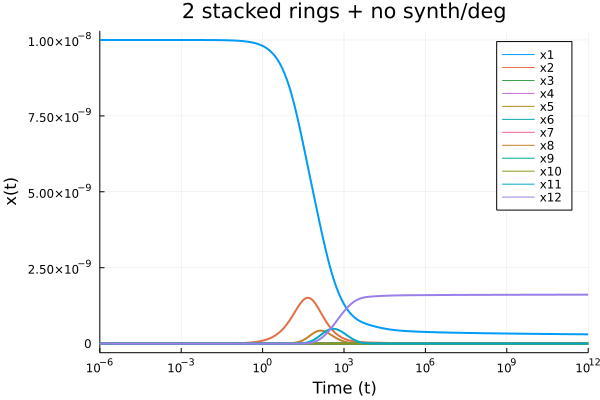

Plot done!


In [3]:
#-------------------------------
# --- parameter values here ---
#-------------------------------
c0=1 # 1M
kd1 = 10^-3 #within a ring (inter) #the bigger the KD to weaker
kd2 = 10^-8 #between ring (intra)
kOn = 10^6 # 10^6 M^-1 s^-1
ΔGp = 9 # 9kcal/M
Rconst = 1.98/1000 #Boltzman constant in J mol^-1 K^-1
T = 300 # in Kelvin (K)
Q = 0; δ = 0;  # synthesis and degradation 
x0Val=10^-8; # x0 M
paramvaluesList= x0Val, kOn, δ, Q, kd1, kd2

#---------------------------------
# --- solve fixed parameter ex ---
#---------------------------------
sol = StackedRings_sd(paramvaluesList)

p1=plot(sol,linewidth=2,title="2 stacked rings + no synth/deg",xaxis = ("Time (t)",:log ),
     yaxis="x(t)", label = ["x1" "x2" "x3" "x4" "x5" "x6" "x7" "x8" "x9" "x10" "x11" "x12"] ) # legend=false
# add a line at 1
# hline!(p1, value = 1, strokeDash = 1, xaxis =:log)
display(p1)
println("Plot done!")

# sol.t[end],sol[end]
#println("Saving file...")
#savefig("C:\\plot_2SR_0715_003.png")
#println("Figure saved")

In [4]:
#from Eric -- ran on python
matrix1=[0.001	0.997006	0.00199103	0.000995012	1.4906e-06	2.98067e-06	2.98067e-06	6.25092e-09	2.08383e-09	4.16712e-09	2.08383e-09	1.77753e-11	1.05907e-14
0.0015	0.995515	0.00297984	0.0014888	3.34418e-06	6.6866e-06	6.6866e-06	2.04445e-08	6.81559e-09	1.36286e-08	6.81559e-09	8.29759e-11	7.02352e-14
0.00225	0.993283	0.00445475	0.00222485	7.49149e-06	1.49772e-05	1.49772e-05	6.76242e-08	2.25446e-08	4.50766e-08	2.25446e-08	4.01257e-10	4.97099e-13
0.003375	0.989949	0.00664852	0.00331863	1.67438e-05	3.34684e-05	3.34684e-05	2.25313e-07	7.51194e-08	1.50176e-07	7.51194e-08	1.99385e-09	3.6988e-12
0.0050625	0.984978	0.0098978	0.00493636	3.72973e-05	7.45308e-05	7.45308e-05	7.50195e-07	2.50137e-07	4.99961e-07	2.50137e-07	9.8813e-09	2.70864e-11
0.00759375	0.977589	0.0146801	0.0073123	8.26671e-05	0.000165124	0.000165124	2.48502e-06	8.28698e-07	1.65584e-06	8.28698e-07	4.87173e-08	1.97772e-10
0.0113906	0.966655	0.0216524	0.0107652	0.000181874	0.000363061	0.000363061	8.15796e-06	2.72109e-06	5.43454e-06	2.72109e-06	2.38566e-07	1.44208e-09
0.0170859	0.950584	0.0316739	0.0157044	0.00039577	0.000789337	0.000789337	2.64238e-05	8.81664e-06	1.75962e-05	8.81664e-06	1.15073e-06	1.03537e-08
0.0256289	0.927197	0.0457745	0.0226041	0.000847427	0.00168796	0.00168796	8.39077e-05	2.80114e-05	5.58469e-05	2.80114e-05	5.42463e-06	7.23779e-08
0.0384434	0.893657	0.0649892	0.0319046	0.00177229	0.00352376	0.00352376	0.000258865	8.64883e-05	0.000172167	8.64883e-05	2.47222e-05	4.86961e-07
0.057665	0.846579	0.0899416	0.0437844	0.00358308	0.00710654	0.00710654	0.000766232	0.000256326	0.000509087	0.000256326	0.000107339	3.09907e-06
0.0864976	0.782515	0.120061	0.0577611	0.00690645	0.0136544	0.0136544	0.00213988	0.00071728	0.00141983	0.00071728	0.000435389	1.82369e-05
0.129746	0.69907	0.152525	0.0722082	0.0124718	0.0245634	0.0245634	0.00552123	0.00185653	0.00365734	0.00185653	0.00160985	9.64478e-05
0.19462	0.596725	0.181561	0.0841555	0.0206791	0.0405649	0.0405649	0.0128497	0.00434208	0.00849658	0.00434208	0.00527591	0.00044366
0.291929	0.480727	0.199394	0.0899967	0.0308653	0.0603472	0.0603472	0.0263525	0.00897195	0.0173984	0.00897195	0.0149088	0.00171829
0.437894	0.361457	0.199708	0.0873076	0.0408776	0.0798242	0.0798242	0.0468218	0.0161175	0.0308959	0.0161175	0.0355854	0.00546388
0.656841	0.251694	0.181809	0.0766082	0.0478647	0.093683	0.093683	0.0717374	0.0250778	0.047404	0.0250778	0.0712426	0.0141185
0.985261	0.161681	0.151512	0.061225	0.0500488	0.0986221	0.0986221	0.0957492	0.0341649	0.0635579	0.0341649	0.120769	0.0298835
1.47789	0.0955702	0.117441	0.0452067	0.0477465	0.0951245	0.0951245	0.113815	0.0416829	0.0762193	0.0416829	0.177358	0.0530287
2.21684	0.0516948	0.0864541	0.0313374	0.0427196	0.0862394	0.0862394	0.12382	0.0468184	0.0841284	0.0468184	0.232351	0.0813783
3.32526	0.0253086	0.0617845	0.0206375	0.0368703	0.0752487	0.0752487	0.126527	0.0496991	0.0878759	0.0496991	0.279586	0.111514
4.98789	0.0111482	0.0437878	0.0129351	0.0314663	0.0642769	0.0642769	0.123934	0.0508951	0.0888943	0.0508951	0.316965	0.140526
7.48183	0.00465843	0.0314355	0.00760562	0.0270472	0.0541178	0.0541178	0.117812	0.050919	0.0885625	0.050919	0.345649	0.167156
11.2227	0.00228641	0.0234336	0.00405148	0.0236389	0.0446933	0.0446933	0.109077	0.0499734	0.0877965	0.0499734	0.368442	0.191941
16.8341	0.00159545	0.0186914	0.00185526	0.0209874	0.035684	0.035684	0.0978164	0.0479648	0.0870247	0.0479648	0.388299	0.216433
25.2512	0.00133279	0.0162708	0.000686602	0.0187004	0.0270094	0.0270094	0.0837187	0.0446949	0.0863578	0.0446949	0.407411	0.242113
37.8768	0.00110151	0.0152404	0.000193878	0.0163181	0.0189517	0.0189517	0.0667165	0.0400612	0.0857875	0.0400612	0.426902	0.269714
56.8151	0.000839691	0.0147941	4.20418e-05	0.0134593	0.0120156	0.0120156	0.0477402	0.0341898	0.0853768	0.0341898	0.446618	0.298719
85.2227	0.000558938	0.0144419	8.85618e-06	0.0100447	0.00667334	0.00667334	0.029144	0.0275353	0.0854943	0.0275353	0.465152	0.326738
127.834	0.00029946	0.0139412	2.14236e-06	0.00640265	0.00310559	0.00310559	0.0141097	0.0208756	0.0869455	0.0208756	0.480618	0.349719
191.751	0.000114894	0.0130969	3.49598e-07	0.00319439	0.00112138	0.00112138	0.00487725	0.0150237	0.0906785	0.0150237	0.491583	0.364165
287.627	2.73093e-05	0.0117181	2.48542e-08	0.00109744	0.000274912	0.000274912	0.00104258	0.010347	0.0969932	0.010347	0.497581	0.370297
431.44	3.47746e-06	0.00977098	1.13587e-09	0.000223973	3.79619e-05	3.79619e-05	0.000115254	0.00665431	0.104953	0.00665431	0.499719	0.371831
647.16	2.63239e-07	0.00746727	5.90883e-11	2.48397e-05	2.72687e-06	2.72687e-06	5.30887e-06	0.00373963	0.112845	0.00373963	0.500137	0.372036
970.74	5.52346e-08	0.00515809	6.09742e-12	1.67298e-06	3.23509e-07	3.23509e-07	7.65682e-08	0.00171869	0.119165	0.00171869	0.500178	0.372059
1456.11	2.76292e-08	0.00321389	2.02991e-12	1.2334e-07	1.1061e-07	1.1061e-07	2.32229e-10	0.000633798	0.12327	0.000633798	0.500178	0.37207
2184.16	1.39007e-08	0.00185862	6.45161e-13	2.48763e-08	3.52979e-08	3.52979e-08	5.98784e-13	0.000199597	0.125488	0.000199597	0.500175	0.372079
3276.25	7.19173e-09	0.00105149	1.93473e-13	1.07039e-08	1.06177e-08	1.06177e-08	9.88742e-14	6.06248e-05	0.126568	6.06248e-05	0.500174	0.372085
4914.37	3.94519e-09	0.000606062	6.10626e-14	5.75929e-09	3.35872e-09	3.35872e-09	2.09779e-14	1.94333e-05	0.127093	1.94333e-05	0.500172	0.37209
7371.55	2.28524e-09	0.000360568	2.09127e-14	3.35483e-09	1.15196e-09	1.15196e-09	5.38966e-15	6.72977e-06	0.127361	6.72977e-06	0.500171	0.372095
11057.3	1.37896e-09	0.000220847	7.68848e-15	2.04046e-09	4.23885e-10	4.23885e-10	1.64682e-15	2.49171e-06	0.127506	2.49171e-06	0.50017	0.372099
16586	8.56198e-10	0.000138323	2.97932e-15	1.27592e-09	1.64344e-10	1.64344e-10	0	9.69766e-07	0.127589	9.69766e-07	0.500169	0.372102
24879	5.41929e-10	8.8013e-05	1.19706e-15	8.12814e-10	6.60528e-11	6.60528e-11	0	3.90708e-07	0.127638	3.90708e-07	0.500168	0.372106
37318.5	3.47245e-10	5.65794e-05	0	5.24317e-10	2.71708e-11	2.71708e-11	0	1.60969e-07	0.127668	1.60969e-07	0.500167	0.372109
55977.7	2.24038e-10	3.65798e-05	0	3.41011e-10	1.13226e-11	1.13226e-11	0	6.71531e-08	0.127686	6.71531e-08	0.500166	0.372112
83966.6	1.44861e-10	2.36836e-05	0	2.22483e-10	4.73865e-12	4.73865e-12	0	2.81187e-08	0.127697	2.81187e-08	0.500165	0.372115
125950	9.34617e-11	1.52934e-05	0	1.45379e-10	1.97303e-12	1.97303e-12	0	1.17127e-08	0.127703	1.17127e-08	0.500164	0.372118
188925	5.98572e-11	9.80008e-06	0	9.59581e-11	8.09911e-13	8.09911e-13	0	4.80914e-09	0.127707	4.80914e-09	0.500163	0.372121
283387	3.77743e-11	6.18684e-06	0	6.22005e-11	3.22298e-13	3.22298e-13	0	1.91408e-09	0.127708	1.91408e-09	0.500162	0.372123
425081	2.32797e-11	3.81375e-06	0	4.03163e-11	1.22214e-13	1.22214e-13	0	7.25933e-10	0.127709	7.25933e-10	0.500161	0.372126
637622	1.37991e-11	2.26097e-06	0	2.6504e-11	4.29186e-14	4.29186e-14	0	2.54951e-10	0.127709	2.54951e-10	0.500161	0.372128
956432	7.66707e-12	1.25637e-06	0	1.72361e-11	1.29218e-14	1.29218e-14	0	7.67635e-11	0.127709	7.67635e-11	0.50016	0.37213
1.43465e+06	3.83086e-12	6.27781e-07	0	1.15006e-11	3.34589e-15	3.34589e-15	0	1.98779e-11	0.127708	1.98779e-11	0.50016	0.372132
2.15197e+06	1.61368e-12	2.6445e-07	0	8.61582e-12	0	0	0	3.50791e-12	0.127708	3.50791e-12	0.500159	0.372133
3.22796e+06	5.04075e-13	8.26095e-08	0	6.92742e-12	0	0	0	2.81275e-13	0.127708	2.81275e-13	0.500159	0.372133
4.84194e+06	9.65645e-14	1.58255e-08	0	6.31079e-12	0	0	0	0	0.127707	0	0.500159	0.372134
7.26291e+06	8.41424e-15	1.37893e-09	0	6.17728e-12	0	0	0	1.89055e-14	0.127707	1.89055e-14	0.500159	0.372134
1.08944e+07	0	1.06218e-10	0	6.16586e-12	0	0	0	9.35096e-15	0.127707	9.35096e-15	0.500159	0.372134
1.63415e+07	0	8.08916e-11	0	6.15667e-12	0	0	0	0	0.127707	0	0.500159	0.372134
2.45123e+07	0	0	0	6.15859e-12	0	0	0	2.27745e-14	0.127707	2.27745e-14	0.500159	0.372134
3.67685e+07	0	0	0	6.14861e-12	0	0	0	0	0.127707	0	0.500159	0.372134
5.51527e+07	2.89095e-15	4.73927e-10	0	6.1474e-12	0	0	0	0	0.127707	0	0.500159	0.372134
8.27291e+07	0	0	0	6.15979e-12	0	0	0	0	0.127707	0	0.500159	0.372134
1.24094e+08	0	0	0	6.15803e-12	0	0	0	0	0.127707	0	0.500159	0.372134
1.8614e+08	0	0	0	6.15551e-12	0	0	0	0	0.127707	0	0.500159	0.372134
2.79211e+08	0	7.54518e-14	0	6.152e-12	0	0	0	0	0.127707	0	0.500159	0.372134
4.18816e+08	0	3.86527e-15	0	6.14674e-12	0	0	0	0	0.127707	0	0.500159	0.372134
6.28224e+08	0	1.22493e-15	0	6.13887e-12	0	0	0	0	0.127707	0	0.500159	0.372134
9.42336e+08	0	0	0	6.1271e-12	0	0	0	0	0.127707	0	0.500159	0.372134
1.4135e+09	0	0	0	6.10951e-12	0	0	0	0	0.127707	0	0.500159	0.372134
2.12026e+09	0	0	0	6.08313e-12	0	0	0	0	0.127707	0	0.500159	0.372134
3.18038e+09	0	0	0	6.04356e-12	0	0	0	0	0.127707	0	0.500159	0.372134
4.77057e+09	0	0	0	5.98444e-12	0	0	0	0	0.127707	0	0.500159	0.372134
7.15586e+09	0	0	0	5.8962e-12	0	0	0	0	0.127707	0	0.500159	0.372134
1.07338e+10	0	0	0	5.76385e-12	0	0	0	0	0.127707	0	0.500159	0.372134
1.61007e+10	0	0	0	5.56531e-12	0	0	0	0	0.127707	0	0.500159	0.372134
2.4151e+10	0	0	0	5.26765e-12	0	0	0	0	0.127707	0	0.500159	0.372134
3.62265e+10	0	0	0	4.82248e-12	0	0	0	0	0.127707	0	0.500159	0.372134
5.43398e+10	0	0	0	4.15473e-12	0	0	0	0	0.127707	0	0.500159	0.372134
8.15097e+10	0	0	0	3.1531e-12	0	0	0	0	0.127707	0	0.500159	0.372134
1.22265e+11	0	0	0	1.65066e-12	0	0	0	0	0.127707	0	0.500159	0.372134
1.83397e+11	0	0	0	0	0	0	0	0	0.127707	0	0.500159	0.372134
2.75095e+11	0	0	0	0	0	0	0	0	0.127707	0	0.500159	0.372134
4.12643e+11	0	0	0	0	0	0	0	0	0.127707	0	0.500159	0.372134
6.18965e+11	0	0	0	0	0	0	0	0	0.127707	0	0.500159	0.372134
9.28447e+11	0	0	0	0	0	0	0	0	0.127707	0	0.500159	0.372134]

86×13 Matrix{Float64}:
 0.001       0.997006  0.00199103  0.000995012  …  1.77753e-11  1.05907e-14
 0.0015      0.995515  0.00297984  0.0014888       8.29759e-11  7.02352e-14
 0.00225     0.993283  0.00445475  0.00222485      4.01257e-10  4.97099e-13
 0.003375    0.989949  0.00664852  0.00331863      1.99385e-9   3.6988e-12
 0.0050625   0.984978  0.0098978   0.00493636      9.8813e-9    2.70864e-11
 0.00759375  0.977589  0.0146801   0.0073123    …  4.87173e-8   1.97772e-10
 0.0113906   0.966655  0.0216524   0.0107652       2.38566e-7   1.44208e-9
 0.0170859   0.950584  0.0316739   0.0157044       1.15073e-6   1.03537e-8
 0.0256289   0.927197  0.0457745   0.0226041       5.42463e-6   7.23779e-8
 0.0384434   0.893657  0.0649892   0.0319046       2.47222e-5   4.86961e-7
 0.057665    0.846579  0.0899416   0.0437844    …  0.000107339  3.09907e-6
 0.0864976   0.782515  0.120061    0.0577611       0.000435389  1.82369e-5
 0.129746    0.69907   0.152525    0.0722082       0.00160985   9.64478e

In [5]:
show(matrix1[3,2])

0.993283

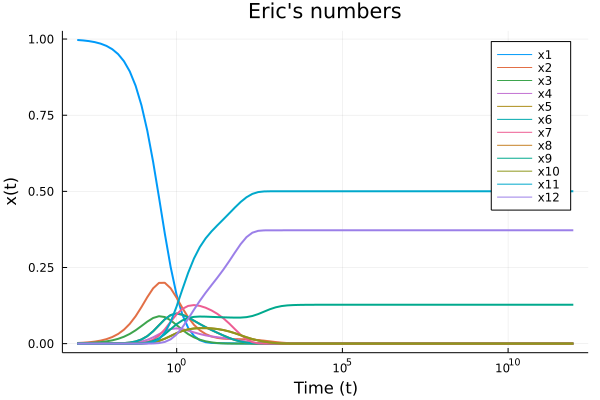

In [6]:
p2=plot((matrix1[:,1],matrix1[:,2:13]),linewidth=2,title="Eric's numbers",xaxis = ("Time (t)",:log ),
yaxis="x(t)", label = ["x1" "x2" "x3" "x4" "x5" "x6" "x7" "x8" "x9" "x10" "x11" "x12"], plotjoined=true) # legend=false

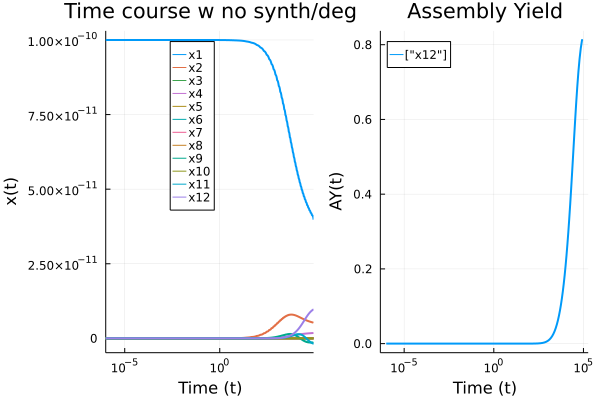

Plot done!


In [13]:
# LL - new equations from EJD

#-------------------------------
# --- parameter values here ---
#-------------------------------
c0=1 # 1M
kd1 = 10^-12 #within a ring (inter) #the bigger the KD to weaker
kd2 = 10^-3 #between ring (intra)
kOn = 10^6 # 10^6 M^-1 s^-1
ΔGp = 9 # 9kcal/M
Rconst = 1.98/1000 #Boltzman constant in J mol^-1 K^-1
T = 300 # in Kelvin (K)
Q = 0; δ = 0;  # synthesis and degradation 

#x0Val=10^-8; # x0 M
x0Val=10^-10
paramvaluesList= x0Val, kOn, δ, Q, kd1, kd2

#---------------------------------
# --- solve fixed parameter ex ---
#---------------------------------
sol = StackedRings_EJD(paramvaluesList)
p1=plot(sol,linewidth=2,title="Time course w no synth/deg",xaxis = ("Time (t)",:log ),
     yaxis="x(t)", label = ["x1" "x2" "x3" "x4" "x5" "x6" "x7" "x8" "x9" "x10" "x11" "x12"], legend=:top) # legend=false

aytc_01 = AYtimeCourse(sol);
list_AY=aytc_01[1]; timePts=aytc_01[2]
p2=plot(timePts,list_AY,linewidth=2,title="Assembly Yield",xaxis = ("Time (t)",:log ),
         yaxis="AY(t)", label = ["x12"], legend=:topleft )

# --- plot AY time course as well --- 
p3=plot(p1,p2, layout=2)
display(p3)
println("Plot done!")

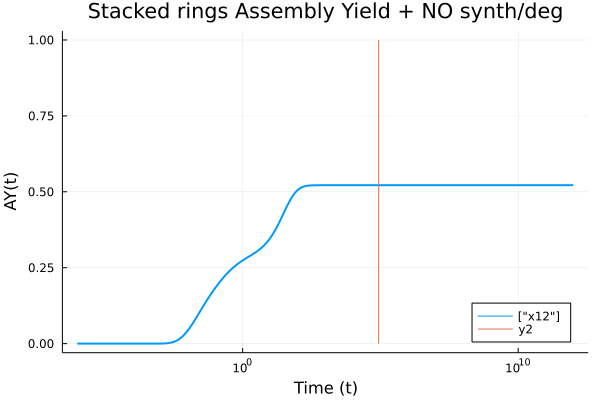

Plot done!


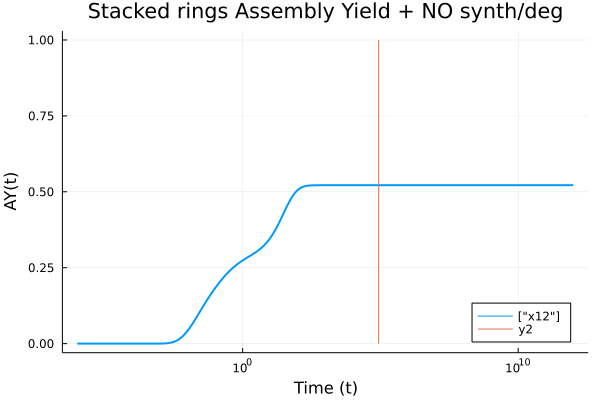

In [14]:
#-------------------------------
# --- AY time course curve -----
#-------------------------------
c0=1
kd1 = 10^-8 #within a ring (inter) #the bigger the KD to weaker
kd2 = 10^-8 #between ring (intra)
ΔGp = 9
Rconst = 1.98/1000 #Boltzman constant in J mol^-1 K^-1
T = 300 # in Kelvin (K)
Q = 0; δ = 0;  # synthesis and degradation 
#--- initial condition ---
#tic() # check time elapsed
x0Val=10^-4; kOn = 10^6 #tolerances set to 10^-12 in stacked ring solver, cusp behavoir around x0val~ big
paramvaluesList= x0Val, kOn, δ, Q, kd1, kd2
sol = StackedRings_sd(paramvaluesList)

aytc_01 = AYtimeCourse(sol);
list_AY=aytc_01[1]; timePts=aytc_01[2]
plotAYtimeCourse(list_AY, timePts)
#toc()



In [ ]:
#---------------------------------
# --- IC vs AY curve DEBUGGING ---
#---------------------------------

# LL -- AY 

# Plot TC + AY tc  

# fixed parameters
c0=1 # 1M
kOn = 10^6 # 10^6 M^-1 s^-1
ΔGp = 9 # 9kcal/M
Rconst = 1.98/1000 #Boltzman constant in J mol^-1 K^-1
T = 300 # in Kelvin (K)
Q = 0; δ = 0;  # synthesis and degradation 
kd1 = 10^-12
kd2 = 10^-3

allICs = [4*10^-6, 10^-10, 10^-4]

x0Val=allICs[1];x0Val_str=round(x0Val, digits = 10)
paramvaluesList_1= x0Val, kOn, δ, Q, kd1, kd2
sol_IC_1 = StackedRings_EJD(paramvaluesList_1)
tc_p1=plot(sol_IC_1,linewidth=2,title="IC=$x0Val_str",xaxis = ("Time (t)",:log ),
     yaxis="x(t)", legend=false ) # legend=false

timePts = sol_IC_1.t; allSols = sol_IC_1.u; # list of all solutions 
# plot AY tc 
totPts = length(timePts); #print("Time points: ", totPts)
list_AY=[]; n=6 
XT = x0Val
for tp_i = 1:totPts
    slntEnd_pre = allSols[tp_i,:]; # println("prevec: ", slntEnd_pre)
    slntEnd = slntEnd_pre[1]; #println("Sln: ", slntEnd); println("-----")
    # --- calculate Xn = X12 ---
    Xn = slntEnd[12]; #println("Xn: ", Xn)
    # --- calculate Yn ---
    Yn = n*Xn/XT; # add this to the AY list
    push!(list_AY, Yn)
end 

tc_p1_ay=plot(timePts,list_AY,linewidth=2,title="IC=$x0Val_str",xaxis = ("Time (t)",:log ),
     yaxis="AY(t)", legend=false ) # legend=false


print("done")


plot(tc_p1, tc_p1_ay, layout=(2,1))


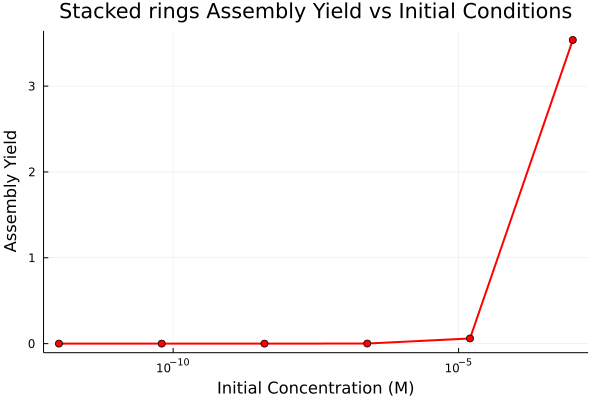

Red done!


In [15]:
#-------------------------------
# --- IC vs AY curve ---
#-------------------------------

# IC vs Ay --- LL 

# fixed parameters
c0=1 # 1M
kOn = 10^6 # 10^6 M^-1 s^-1
ΔGp = 9 # 9kcal/M
Rconst = 1.98/1000 #Boltzman constant in J mol^-1 K^-1
T = 300 # in Kelvin (K)
Q = 0; δ = 0;  # synthesis and degradation 

nICpts=6;minDeg=-12; maxDeg=-3

# --- change these to generate highlighted curves --- 
# - red curve -
kd1 = 10^-12 #within a ring (inter) #the bigger the KD to weaker
kd2 = 10^-3 #between ring (intra)
allAYvsIC_red = calcAYvsIC(nICpts,minDeg, maxDeg)
println("Red done!")

allICs= allAYvsIC_red[1]; AYvals=allAYvsIC_red[2]

mycolors = [:red :green :orange :blue :purple]
p3_curve=plot(allICs,AYvals,linewidth=2, linecolor=:match, markershape=:circle, color = mycolors,title="Stacked rings Assembly Yield vs Initial Conditions",xaxis = ("Initial Concentration (M)",:log ),
         yaxis="Assembly Yield",legend=false ) # legend=false
display(p3_curve)

# plot the associated time course plots for each of these IC values 
# only do this for the 5 pts!

# get time courses for each point in the red curve here 
x0Val=allICs[1];x0Val_str=round(x0Val, digits = 10)
paramvaluesList_1= x0Val, kOn, δ, Q, kd1, kd2
sol_IC_1 = StackedRings_EJD(paramvaluesList_1)
tc_p1=plot(sol_IC_1,linewidth=2,title="IC=$x0Val_str",xaxis = ("Time (t)",:log ),
     yaxis="x(t)", legend=false ) # legend=false

x0Val=allICs[2];x0Val_str=round(x0Val, digits = 10)
paramvaluesList_2= x0Val, kOn, δ, Q, kd1, kd2
sol_IC_2 = StackedRings_EJD(paramvaluesList_2)
tc_p2=plot(sol_IC_2,linewidth=2,title="IC=$x0Val_str",xaxis = ("Time (t)",:log ),
     yaxis="x(t)", legend=false ) # legend=false

x0Val=allICs[3];x0Val_str=round(x0Val, digits = 10)
paramvaluesList_3= x0Val, kOn, δ, Q, kd1, kd2
sol_IC_3 = StackedRings_EJD(paramvaluesList_3)
tc_p3=plot(sol_IC_3,linewidth=2,title="IC=$x0Val_str",xaxis = ("Time (t)",:log ),
     yaxis="x(t)", legend=false ) # legend=false

x0Val=allICs[4];x0Val_str=round(x0Val, digits = 10)
paramvaluesList_4= x0Val, kOn, δ, Q, kd1, kd2
sol_IC_4 = StackedRings_EJD(paramvaluesList_4)
tc_p4=plot(sol_IC_3,linewidth=2,title="IC=$x0Val_str",xaxis = ("Time (t)",:log ),
     yaxis="x(t)", legend=false ) # legend=false

x0Val=allICs[5];x0Val_str=round(x0Val, digits = 10)
paramvaluesList_5= x0Val, kOn, δ, Q, kd1, kd2
sol_IC_5 = StackedRings_EJD(paramvaluesList_5)
tc_p5=plot(sol_IC_5,linewidth=2,title="IC=$x0Val_str",xaxis = ("Time (t)",:log ),
     yaxis="x(t)", legend=false ) # legend=false

x0Val=allICs[6];x0Val_str=round(x0Val, digits = 10)
paramvaluesList_6= x0Val, kOn, δ, Q, kd1, kd2
sol_IC_6 = StackedRings_EJD(paramvaluesList_6)
tc_p6=plot(sol_IC_6,linewidth=2,title="IC=$x0Val_str",xaxis = ("Time (t)",:log ),
     yaxis="x(t)", legend=false ) # legend=false

plot(tc_p1,tc_p2,tc_p3,tc_p4,tc_p5,tc_p6, layout = (3,2))

In [18]:
#----------------
#--- KD1 v AY ---
#----------------
# by PM

# fixed parameters
#-------------------------------
# --- parameter values here ---
#-------------------------------
c0=1 # 1M
#kd1 = 10^-3 #within a ring (inter) #the bigger the KD to weaker
kd2 = 10^-8 #between ring (intra)
kOn = 10^6 # 10^6 M^-1 s^-1
ΔGp = 9 # 9kcal/M
Rconst = 1.98/1000 #Boltzman constant in J mol^-1 K^-1
T = 300 # in Kelvin (K)
Q = 0; δ = 0;  # synthesis and degradation 
x0Val=10^-8; # x0 M

#--- if kd1 remains defined globally uncomment
#kd1= nothing #clears kd1 value globally
#GC.gc() #runs garbage collector

function calcAYvsKD1(nKD1,minKD1, maxKD1) #number of steps, min, max
    # this function will calculate AY for different KD1 (inter) values at each time point but only for the x12 species 
    # nIKD1 = number of initial condition points to consider
    AllKD1s = []
    for i in LinRange(minKD1, maxKD1,nKD1)#start, stop, number of steps
        KD1=10^i
        push!(AllKD1s, KD1)
    end
    println(AllKD1s)

    # initialize lists to store
    AY_list = []
    # loop to solve AY for each KD 
    #println("before for loop is good")
    for KD1s in AllKD1s # loop through all the KD1 values
        kd1=KD1s
        println(kd1)
        println("-")
        paramvaluesList= x0Val, kOn, δ, Q, kd1, kd2
        sol = StackedRings_EJD(paramvaluesList);
        # calculate AY 
        ayVali = assemblyYield(sol); print(ayVali)
        println("*")
        # store value of AY 
        push!(AY_list, ayVali)
    end 
    
    return AllKD1s, AY_list
    
end


calcAYvsKD1(3,4,6)#number of steps, min, max


AY_list=[]
c0=1 # 1M
kd2 = 10^-6 #between ring (intra)
kOn = 10^6 # 10^6 M^-1 s^-1
ΔGp = 9 # 9kcal/M
Rconst = 1.98/1000 #Boltzman constant in J mol^-1 K^-1
T = 300 # in Kelvin (K)
Q = 0; δ = 0;  # synthesis and degradation 
x0Val=10^-8; # x0 M


Any[10000.0, 100000.0, 1.0e6]
10000.0
-
1.0683695234753113e-15*
100000.0
-
1.0687934826770398e-21*
1.0e6
-
1.0682812858827456e-27*


In [ ]:
c0=1 # 1M
#kd1 = 10^-3 #within a ring (inter) #the bigger the KD to weaker
#kd2 = 10^-8 #between ring (intra)
kOn = 10^6 # 10^6 M^-1 s^-1
ΔGp = 9 # 9kcal/M
Rconst = 1.98/1000 #Boltzman constant in J mol^-1 K^-1
T = 300 # in Kelvin (K)
Q = 0; δ = 0;  # synthesis and degradation 
x0Val=10^-8; # x0 M
var2= KD1KD2vAY(-6,-4,3, -6,-4,3)
println(var2[3])
println("---------")
for AYval in var2[3]'
    x=log10(AYval) 
    println(x)
end
println("-------")
y=log.(var2[3])
println(y)


In [ ]:
var3=KD1KD2vAY(-10,-6, 5, -10, -6, 5)
println("kd1:")
println(var3[1])
println("kd2:")
println(var3[2])
println("AY:")
println(var3[3])

In [ ]:
c0=1 # 1M
kd1 = 10^-10 #within a ring (inter) #the bigger the KD to weaker
kd2 = 10^-10 #between ring (intra)
kOn = 10^6 # 10^6 M^-1 s^-1
ΔGp = 9 # 9kcal/M
Rconst = 1.98/1000 #Boltzman constant in J mol^-1 K^-1
T = 300 # in Kelvin (K)
Q = 0; δ = 0;  # synthesis and degradation 
x0Val=10^-8; # x0 M
paramvaluesList= x0Val, kOn, δ, Q, kd1, kd2
sol= StackedRings_EJD(paramvaluesList)
assemblyYield_24hrs(sol)

In [19]:
#function to plot heatmap KD1kd2vay
function plotkd1kd2ayheatmap(All_KD1, All_KD2, AY_matrix)
    xvalues=log10.(All_KD1)
    yvalues=log10.(All_KD2)
    plot1= heatmap(x= (xvalues, "Intra-Ring Kd1"), yaxis= (yvalues,"Inter-Ring Kd2"), z=AY_matrix)
    return plot1
end

plotkd1kd2ayheatmap (generic function with 1 method)

In [20]:
plotkd1kd2ayheatmap(-12, -3, 100, -12, -3, 100)

LoadError: MethodError: no method matching plotkd1kd2ayheatmap(::Int64, ::Int64, ::Int64, ::Int64, ::Int64, ::Int64)
[0mClosest candidates are:
[0m  plotkd1kd2ayheatmap(::Any, ::Any, ::Any) at In[19]:2

In [ ]:
All_KD1, All_KD2, AY_matrix=var1[1],var1[2],var1[3]
xvalues=log10.(All_KD1)
yvalues=log10.(All_KD2)
plot1= plot(heatmap(x= (xvalues, "Intra-Ring Kd1"), yaxis= (yvalues,"Inter-Ring Kd2"), z=AY_matrix))
plot1

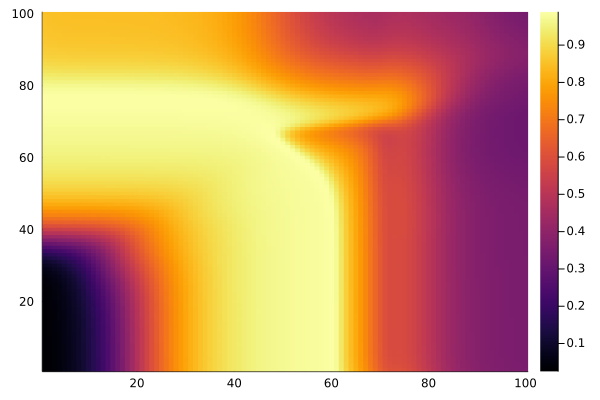

In [24]:
var5= KD1KD2vAY(-12, -3, 100, -12, -3, 100)
#println(var5[3])
using Plots
FigA=heatmap(var5[3])
FigA

In [29]:
xval5=log10.(var5[1])
print(xval5)
print("_____________")
length(xval5)
print("_____________")


[-3.0, -3.090909090909091, -3.1818181818181817, -3.272727272727273, -3.3636363636363638, -3.4545454545454546, -3.545454545454546, -3.6363636363636367, -3.7272727272727275, -3.818181818181818, -3.909090909090909, -4.0, -4.090909090909091, -4.1818181818181825, -4.2727272727272725, -4.363636363636363, -4.454545454545455, -4.545454545454545, -4.636363636363636, -4.727272727272727, -4.818181818181818, -4.909090909090908, -5.0, -5.090909090909092, -5.181818181818182, -5.2727272727272725, -5.363636363636363, -5.454545454545454, -5.545454545454545, -5.636363636363637, -5.7272727272727275, -5.818181818181818, -5.909090909090909, -6.0, -6.090909090909091, -6.181818181818182, -6.2727272727272725, -6.363636363636364, -6.454545454545454, -6.545454545454545, -6.636363636363637, -6.7272727272727275, -6.818181818181818, -6.90909090909091, -7.0, -7.09090909090909, -7.181818181818182, -7.272727272727273, -7.363636363636363, -7.454545454545454, -7.545454545454545, -7.636363636363637, -7.7272727272727275,

In [38]:
xval5_s= new ArrayList<>(var5[3].size())
for i in var5[1]
    xval5_s.push(String.valueOf(i))
end
println(xval5_s)

LoadError: syntax: extra token "ArrayList" after end of expression

[-3.0, -3.090909090909091, -3.1818181818181817, -3.272727272727273, -3.3636363636363638, -3.4545454545454546, -3.545454545454546, -3.6363636363636367, -3.7272727272727275, -3.818181818181818, -3.909090909090909, -4.0, -4.090909090909091, -4.1818181818181825, -4.2727272727272725, -4.363636363636363, -4.454545454545455, -4.545454545454545, -4.636363636363636, -4.727272727272727, -4.818181818181818, -4.909090909090908, -5.0, -5.090909090909092, -5.181818181818182, -5.2727272727272725, -5.363636363636363, -5.454545454545454, -5.545454545454545, -5.636363636363637, -5.7272727272727275, -5.818181818181818, -5.909090909090909, -6.0, -6.090909090909091, -6.181818181818182, -6.2727272727272725, -6.363636363636364, -6.454545454545454, -6.545454545454545, -6.636363636363637, -6.7272727272727275, -6.818181818181818, -6.90909090909091, -7.0, -7.09090909090909, -7.181818181818182, -7.272727272727273, -7.363636363636363, -7.454545454545454, -7.545454545454545, -7.636363636363637, -7.7272727272727275,

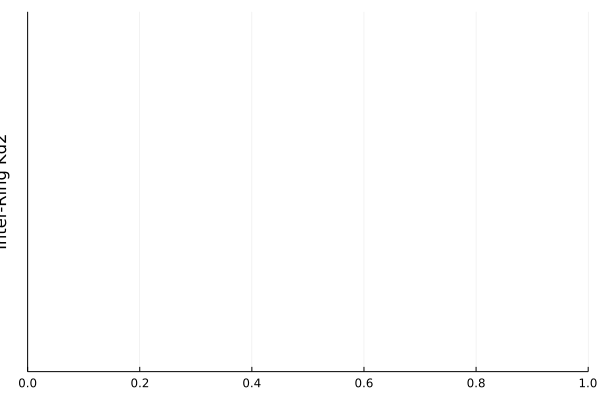

In [22]:
All_KD1, All_KD2, AY_matrix=var5[1],var5[2],var5[3]
xvalues=log10.(All_KD1)
yvalues=log10.(All_KD2)
println(xvalues)
plot1= plot(heatmap(x= (xvalues, "Intra-Ring Kd1"), yaxis= (yvalues,"Inter-Ring Kd2"), z=AY_matrix))
plot1

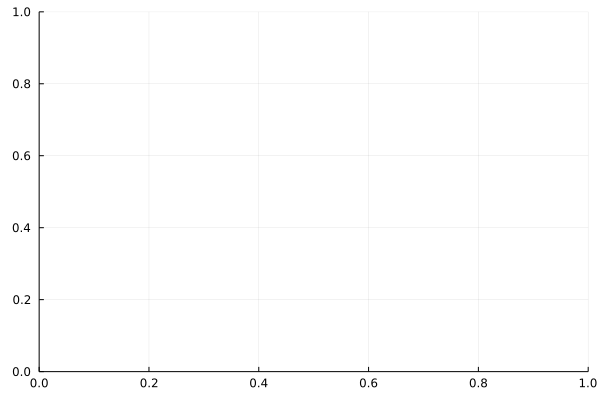

In [32]:
using Plots
FigB=heatmap(x=[string], y= (string(var5[2])), z=var5[3])
FigB

In [ ]:
#set target AY values
#force the computer to run all combinations in set range, need to give set stize?--> want to avoid I think-- set acceptable error?
#--------------------------------
#--- Contour lines by PM --------
#--------------------------------

function CreateContours(KD1List, KD2List, AYlist, AY_val)
    for AYs in AYlist:
        if AYs= AY_val
            push!(KD1List_,KD2List)

In [ ]:
b=((a.>0.37) .& (a.<0.38))
b
#heatmap(b)